<a href="https://colab.research.google.com/github/insoucyant/Learn_Python/blob/master/LeetCodeTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.youtube.com/watch?v=6ScBLgESFas&list=PLKYEe2WisBTH48RzVCL_LQrGW-ahPY44S

# 226. Invert Binary Tree
Given the root of a binary tree, invert the tree, and return its root.



Example 1:
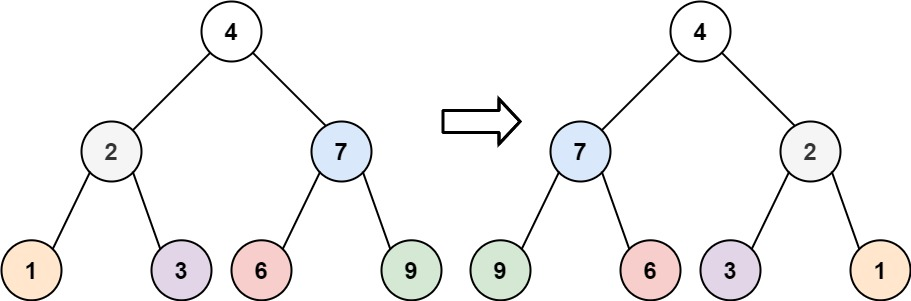

Input: root = [4,2,7,1,3,6,9] <br>
Output: [4,7,2,9,6,3,1] <br>
Example 2: <br>

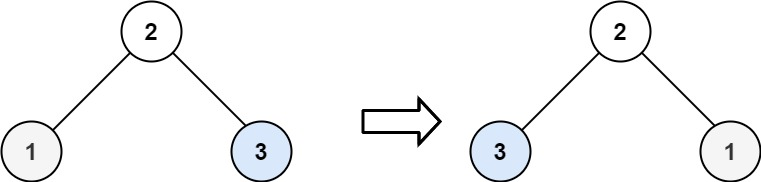
Input: root = [2,1,3] <br>
Output: [2,3,1] <br>
Example 3: <br>

Input: root = [] <br>
Output: [] <br>


In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def invertTree(self, root: Optional[TreeNode]) -> Optional[TreeNode]:
        if not root:
            return None
        root.left, root.right = root.right, root.left

        self.invertTree(root.left)
        self.invertTree(root.right)

        return root

        # Time O(n)
        # Space O(h) h--> Height of the tree


# 104. Maximum Depth of Binary Tree
* Depth First Search
* 1 + max(Left, Right)

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def maxDepth(self, root: Optional[TreeNode]) -> int:
        if not root:
            return 0
        left = self.maxDepth(root.left)
        right = self.maxDepth(root.right)

        return 1 + max(left, right)

        # Time: O(n)
        # Space: O(h)

# 110. Balanced Binary Tree
* DFS

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isBalanced(self, root: Optional[TreeNode]) -> bool:
        balanced = [True]
        def height(root):
            if not root:
                return 0
            left_height = height(root.left)
            if balanced[0] is False:
                return 0
            right_height = height(root.right)

            if abs(left_height-right_height) > 1:
                balanced[0] = False
                return 0
            return 1+max(left_height, right_height)

        height(root)
        return balanced[0]


# 543. Diameter of Binary Tree
Given the root of a binary tree, return the length of the diameter of the tree.<br>

The diameter of a binary tree is the length of the longest path between any two nodes in a tree. This path may or may not pass through the root. <br>

The length of a path between two nodes is represented by the number of edges between them. <br>
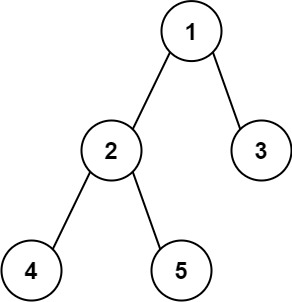




Input: root = [1,2,3,4,5] <br>
Output: 3 <br>
Explanation: 3 is the length of the path [4,2,1,3] or [5,2,1,3]. <br>

Any node's diameter = height of the left sub tree + Height of the right sub tree <br>
Height of a node = 1 + max (height of left, height of right) <br>

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def diameterOfBinaryTree(self, root: Optional[TreeNode]) -> int:
        largest_dia = [0] # Making it a list instead of a variable makes it a global variable and accessible from inside the helper function below


        def height(root): # Helper Function
            if root is None:
                return 0
            left_height = height(root.left)
            right_height = height(root.right)
            dia = left_height + right_height
            largest_dia[0] = max(largest_dia[0], dia)

            return 1 + max(left_height, right_height)

        height(root)

        return largest_dia[0]



# 100. Same Tree
Given the roots of two binary trees p and q, write a function to check if they are the same or not. <br>

Two binary trees are considered the same if they are structurally identical, and the nodes have the same value. <br>



Example 1: <br>
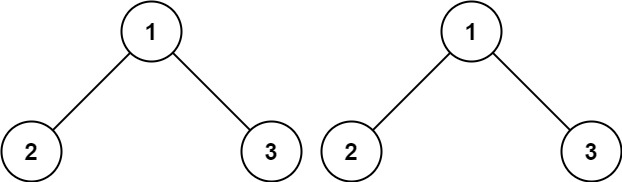

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isSameTree(self, p: Optional[TreeNode], q: Optional[TreeNode]) -> bool:
        def balanced(p,q): # Recursive Helper Function
            if not p and not q:
                return True

            if (p and not q) or (q and not p):
                return False

            if p.val != q.val:
                return False

            return balanced(p.left, q.left) and balanced(p.right, q.right)

        return balanced(p,q)

      # Time: O(n + m) / O(n)
      # Space: O(h_p + h_q) / O(h)

# 101. Symmetric Tree
Given the root of a binary tree, check whether it is a mirror of itself (i.e., symmetric around its center).
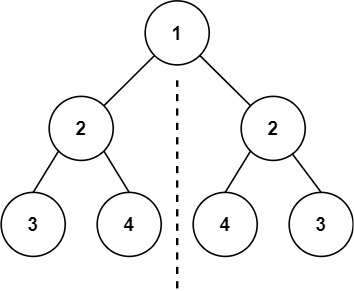

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isSymmetric(self, root: Optional[TreeNode]) -> bool:
        def same(root1, root2):
            if not root1 and not root2:
                return True
            if not root1 or not root2:
                return False
            if root1.val != root2.val:
                return False

            return same(root1.left, root2.right) and \
                   same(root1.right, root2.left)

        return same(root, root)


# 572. Subtree of Another Tree
Given the roots of two binary trees root and subRoot, return true if there is a subtree of root with the same structure and node values of subRoot and false otherwise.

A subtree of a binary tree tree is a tree that consists of a node in tree and all of this node's descendants. The tree tree could also be considered as a subtree of itself.

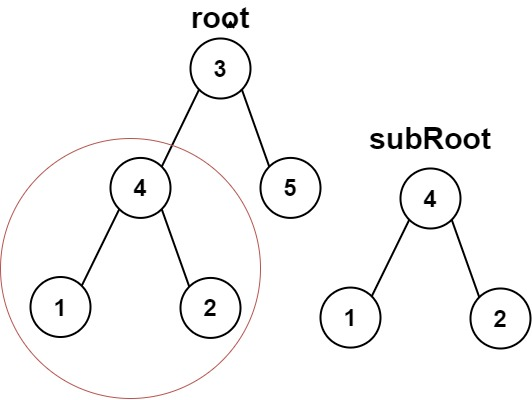


In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isSubtree(self, root: Optional[TreeNode], subRoot: Optional[TreeNode]) -> bool:
        def sameTree(p,q):
            if not p and not q:
                return True
            if not p or not q:
                return False
            if p.val != q.val:
                return False

            return sameTree(p.left, q.left) and \
                   sameTree(p.right, q.right)

        def has_subtree(root):
            if not root:
                return False
            if sameTree(root, subRoot):
                return True

            return has_subtree(root.left) or has_subtree(root.right)

        return has_subtree(root)


# 1448. Count Good Nodes in Binary Tree
Given a binary tree root, a node X in the tree is named good if in the path from root to X there are no nodes with a value greater than X. <br>

Return the number of good nodes in the binary tree. <br>
  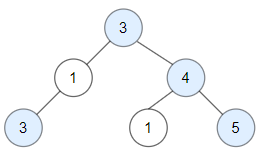


Input: root = [3,1,4,3,null,1,5] <br>
Output: 4 <br>
Explanation: Nodes in blue are good. <br>
Root Node (3) is always a good node. <br>
Node 4 -> (3,4) is the maximum value in the path starting from the root. <br>
Node 5 -> (3,4,5) is the maximum value in the path <br>
Node 3 -> (3,1,3) is the maximum value in the path. <br>

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def goodNodes(self, root: TreeNode) -> int:
        good_nodes = 0
        stk = [(root, float('-inf'))]

        while stk: #Iterative DFS
            node, largest = stk.pop()
            if largest <= node.val:
                good_nodes += 1
            largest = max(largest, node.val)

            if node.right: stk.append((node.right, largest))
            if node.left: stk.append((node.left, largest))

        return good_nodes



# 112. Path Sum
Given the root of a binary tree and an integer targetSum, return true if the tree has a root-to-leaf path such that adding up all the values along the path equals targetSum.

A leaf is a node with no children. <br>

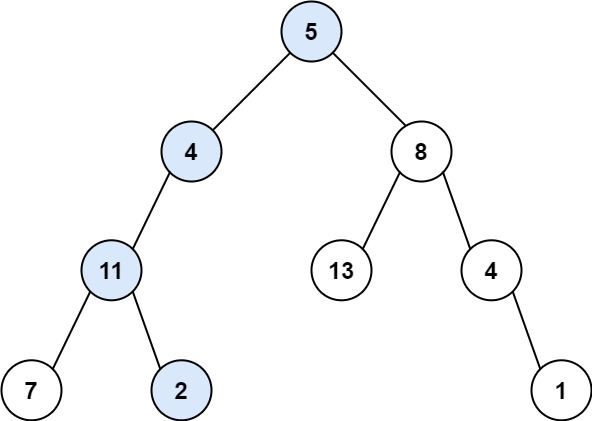



In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def hasPathSum(self, root: Optional[TreeNode], targetSum: int) -> bool:
        # DFS
        #Helper Function
        def has_sum(root, curr_sum):
            if not root:
                return False
            curr_sum += root.val
            if not root.left and not root.right:
                return curr_sum == targetSum

            return has_sum(root.left, curr_sum) or has_sum(root.right, curr_sum)

        return has_sum(root,0)
        # Time: O(N)
        # Space: O(h)
